In [92]:
import pandas as pd
import seaborn as sns
%matplotlib inline

## 2. Análisis exploratorio

In [93]:
data = pd.read_csv('real_estate_valuation_data_set.csv',index_col=0)

In [94]:
data.shape

(414, 7)

In [95]:
data.head()

,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
No,,,,,,,
1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


In [96]:
data.describe()

,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,2013.148971,17.712560,1083.885689,4.094203,24.969030,121.533361,37.980193
std,0.281967,11.392485,1262.109595,2.945562,0.012410,0.015347,13.606488
min,2012.667000,0.000000,23.382840,0.000000,24.932070,121.473530,7.600000
25%,2012.917000,9.025000,289.324800,1.000000,24.963000,121.528085,27.700000
50%,2013.167000,16.100000,492.231300,4.000000,24.971100,121.538630,38.450000
75%,2013.417000,28.150000,1454.279000,6.000000,24.977455,121.543305,46.600000
max,2013.583000,43.800000,6488.021000,10.000000,25.014590,121.566270,117.500000


## 2. (a) Comportamiento individual de cada caracter´ıstica y de la variable de respuesta.

c:\Users\asus\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\asus\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\asus\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\asus\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: us

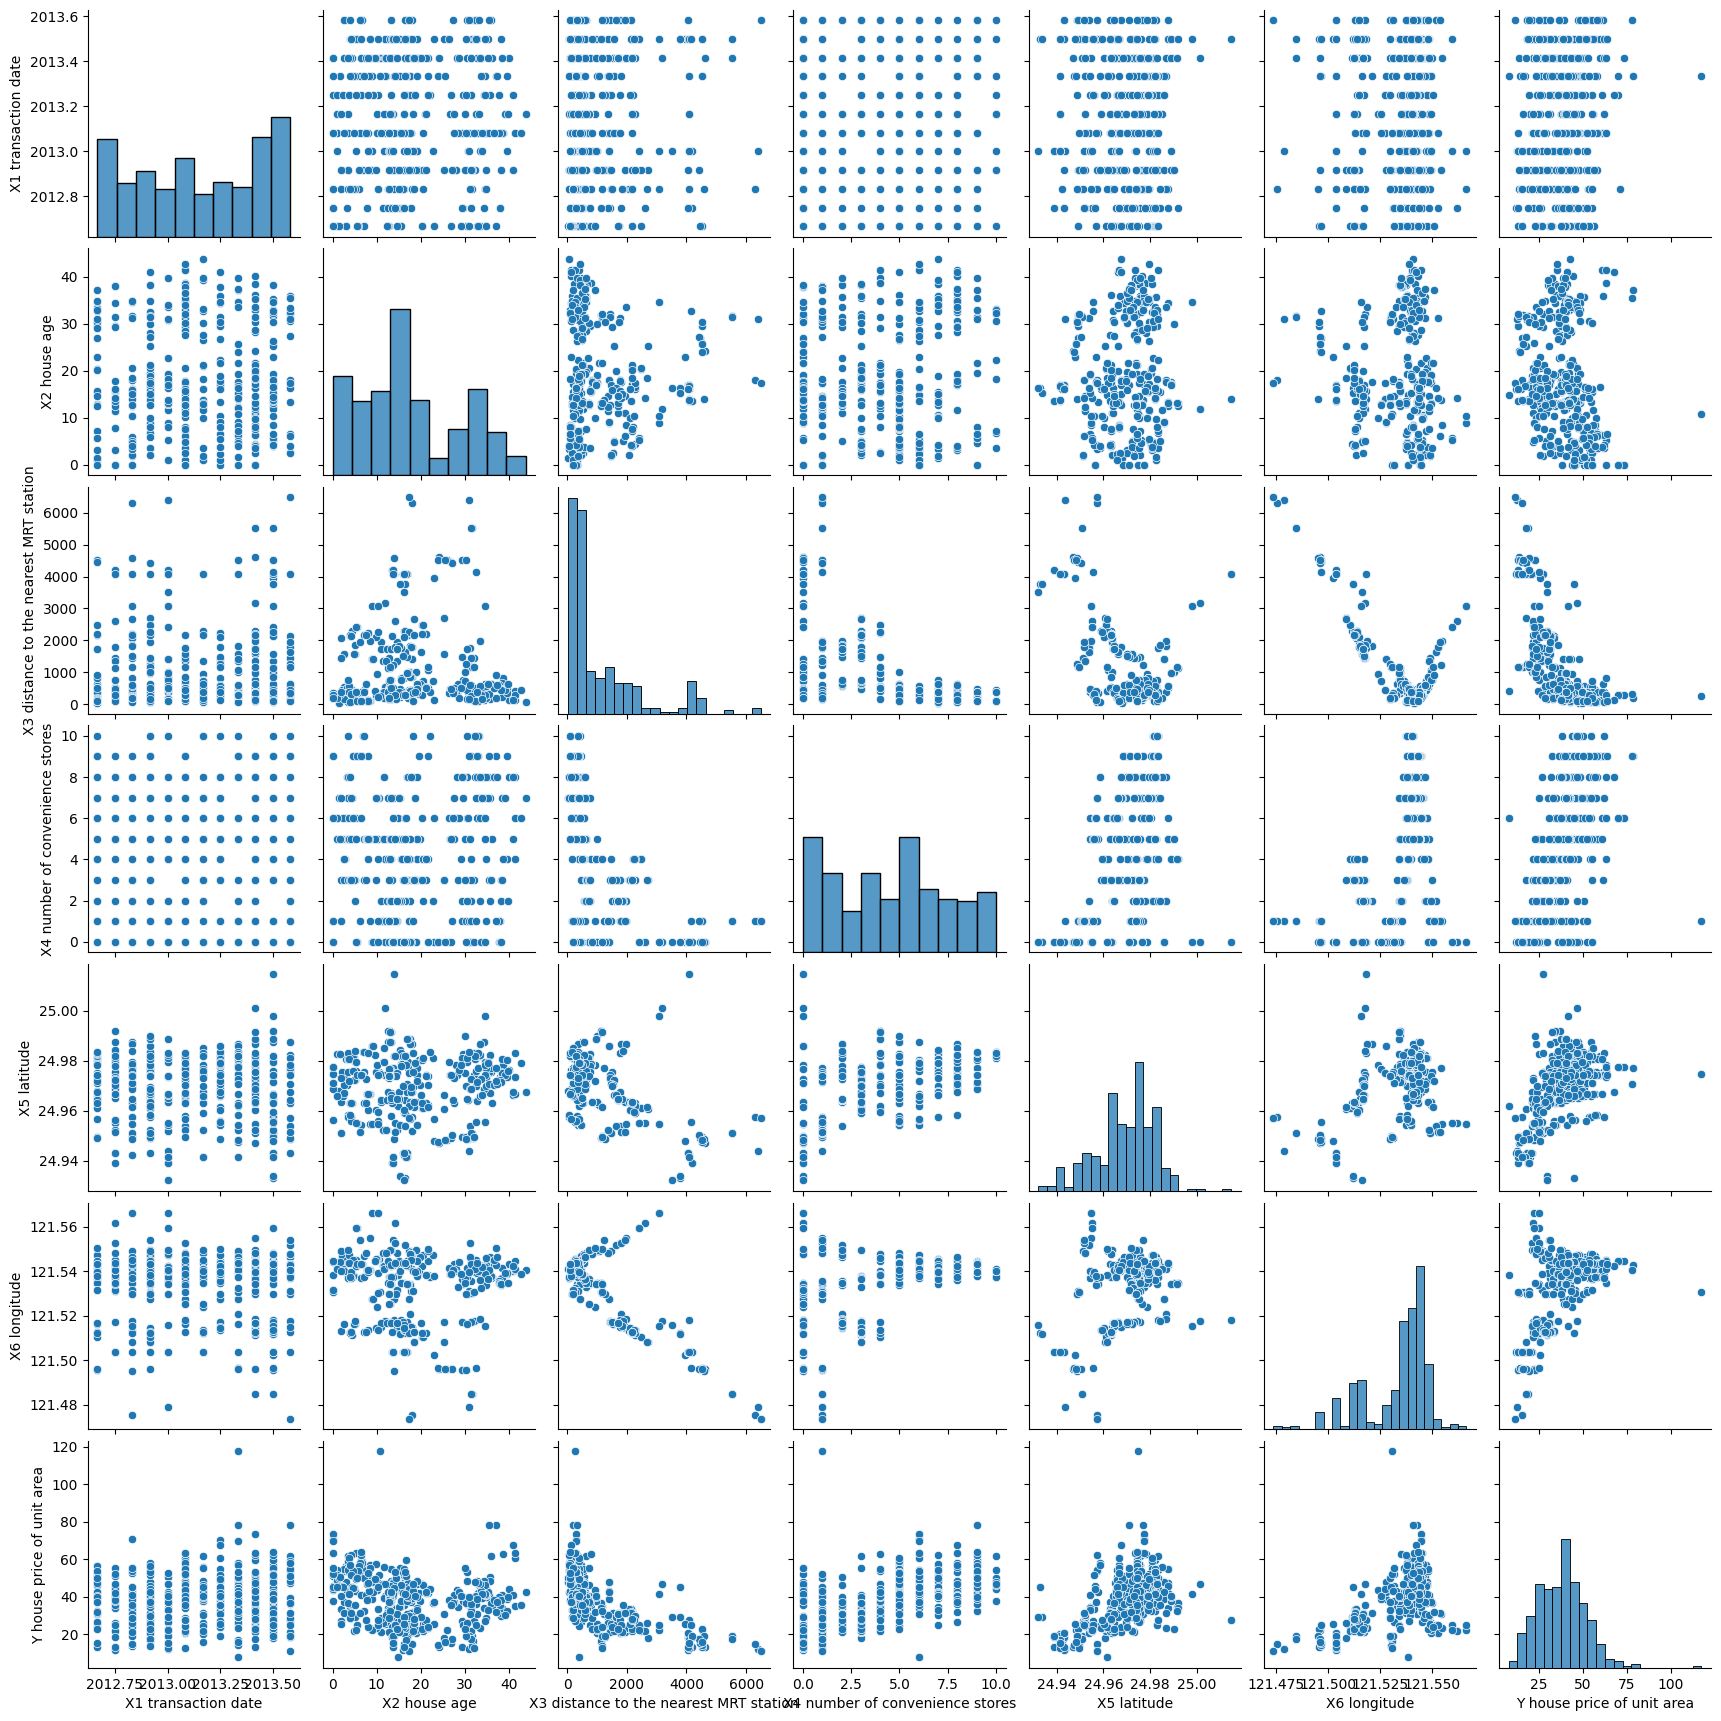

In [97]:
sns.pairplot(data,)

### 2. (b) Correlaciones entre características y con la variable de respuesta.

<Axes: >

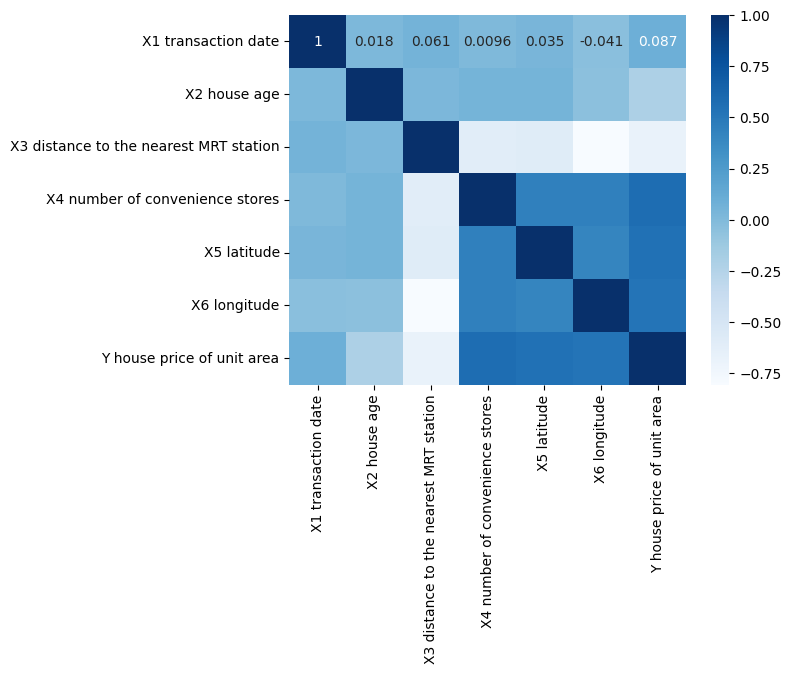

In [120]:
corr = data.corr()
sns.heatmap(corr, cmap="Blues", annot=True)

### 2. (c) Exploración bivariada entre cada característica y la variable de respuesta.

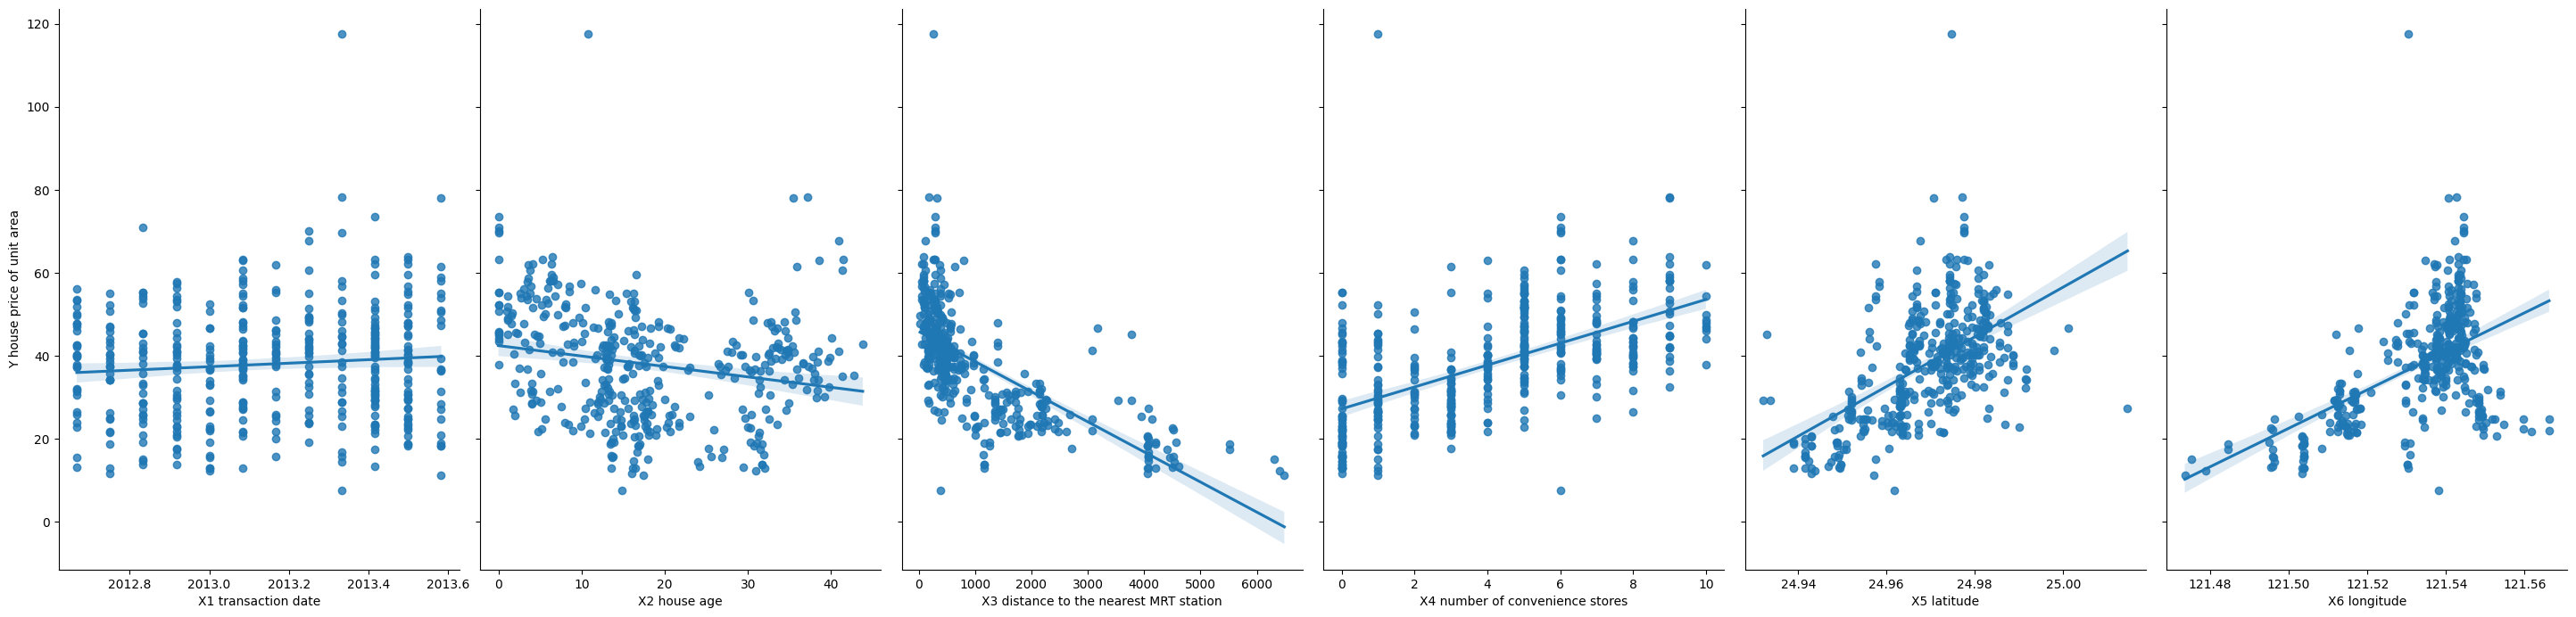

In [99]:
sns.pairplot(data, x_vars=['X1 transaction date','X2 house age','X3 distance to the nearest MRT station','X4 number of convenience stores','X5 latitude','X6 longitude'], y_vars='Y house price of unit area', height=7, aspect=0.7, kind='reg')

In [100]:
pip install folium


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [101]:
first_location = data.iloc[0]
first_location.shape
first_location

X1 transaction date                       2012.91700
X2 house age                                32.00000
X3 distance to the nearest MRT station      84.87882
X4 number of convenience stores             10.00000
X5 latitude                                 24.98298
X6 longitude                               121.54024
Y house price of unit area                  37.90000
Name: 1, dtype: float64

In [102]:
import folium
import pandas as pd

first_location = data.iloc[0]
# Crear el mapa base
m = folium.Map(location=[first_location['X5 latitude'], first_location['X6 longitude']], zoom_start=12)

# Añadir un marcador para cada ubicación en el DataFrame
for idx, row in data.iterrows():
    folium.Marker([row['X5 latitude'], row['X6 longitude']]).add_to(m)

# Mostrar el mapa
m


## 3. Modelo lineal que permite predecir la variable de respuesta a partir de las características.

### 3. (a) Métricas del modelo usando datos de entrenamiento.

In [103]:
features= ['X1 transaction date','X2 house age','X3 distance to the nearest MRT station','X4 number of convenience stores','X5 latitude','X6 longitude']
X=data[features]
X.head()

,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude
No,,,,,,
1,2012.917,32.0,84.87882,10,24.98298,121.54024
2,2012.917,19.5,306.59470,9,24.98034,121.53951
3,2013.583,13.3,561.98450,5,24.98746,121.54391
4,2013.500,13.3,561.98450,5,24.98746,121.54391
5,2012.833,5.0,390.56840,5,24.97937,121.54245


In [104]:
y = data['Y house price of unit area']

y.head()

No
1    37.9
2    42.2
3    47.3
4    54.8
5    43.1
Name: Y house price of unit area, dtype: float64

In [105]:
print(type(X))
print(type(y))

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>


In [106]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [107]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, test_size=0.2)


In [108]:
display(X_train.head())
display(y_train.head())
display(X_test.head())
display(y_test.head())


,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude
No,,,,,,
160,2012.667,15.5,815.93140,4,24.97886,121.53464
96,2012.917,8.0,104.81010,5,24.96674,121.54067
12,2013.333,6.3,90.45606,9,24.97433,121.54310
375,2013.250,5.4,390.56840,5,24.97937,121.54245
166,2012.917,13.7,1236.56400,1,24.97694,121.55391


No
160    37.4
96     51.8
12     58.1
375    49.5
166    30.6
Name: Y house price of unit area, dtype: float64

,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude
No,,,,,,
389,2013.500,10.4,2251.9380,4,24.95957,121.51353
103,2013.083,1.1,193.5845,6,24.96571,121.54089
188,2013.000,8.9,3078.1760,0,24.95464,121.56627
163,2012.750,16.0,4066.5870,0,24.94297,121.50342
91,2012.833,0.0,274.0144,1,24.97480,121.53059


No
389    27.3
103    54.4
188    22.0
163    11.6
91     45.4
Name: Y house price of unit area, dtype: float64

In [109]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(331, 6)
(331,)
(83, 6)
(83,)


In [110]:
from sklearn.linear_model import LinearRegression

# crear el objeto del modelo
linreg = LinearRegression()

# ajustar los parámetros del modelo usando los datos de entrenamiento
linreg.fit(X_train, y_train)

LinearRegression()

In [111]:
print(linreg.intercept_)
print(linreg.coef_)

-12796.117684899313
[ 5.71714218e+00 -2.49326467e-01 -4.93769843e-03  1.07614509e+00
  2.27037100e+02 -3.56988335e+01]


In [112]:
# coeficientes con nombre de las características
list(zip(features, linreg.coef_))

[('X1 transaction date', 5.717142183610284),
 ('X2 house age', -0.24932646689585305),
 ('X3 distance to the nearest MRT station', -0.004937698432022963),
 ('X4 number of convenience stores', 1.076145093445308),
 ('X5 latitude', 227.0371003711649),
 ('X6 longitude', -35.698833465050804)]

### Predicciones usando los datos de prueba

In [113]:
y_pred = linreg.predict(X_test)

### Evaluar el modelo

In [114]:
from sklearn import metrics

In [115]:
import numpy as np

# mean absolute error
MAE = metrics.mean_absolute_error(y_test, y_pred)

# mean squared error
MSE = metrics.mean_squared_error(y_test, y_pred)

# root mean squared error
RMSE = np.sqrt(MSE)

In [116]:
print("MAE: ", MAE)
print("MSE: ", MSE)
print("RMSE: ", RMSE)

MAE:  5.343030944663055
MSE:  45.01050719519454
RMSE:  6.708987046879323


### 3. (b) Métricas del modelo usando validación cruzada.


In [117]:
from sklearn.model_selection import cross_val_score

# usar MSE - error cuadrático medio
scores = cross_val_score(linreg, X, y, cv=5, scoring='neg_mean_squared_error')
mse_scores = - scores
print(mse_scores)

[ 49.89813853  89.0294996   57.865991   134.82397694  60.0535528 ]


In [118]:
# calcular RMSE
rmse_scores = np.sqrt(mse_scores)
print(rmse_scores)

[ 7.06386145  9.43554448  7.6069699  11.61137274  7.74942274]


In [82]:
# RMSE promedio a través de todos los grupos
print(rmse_scores.mean())

8.693434260346574


### (C) Evaluación del modelo y sus parámetros empleando pruebas estadísticas.

In [125]:
import statsmodels.api as sm

features= ['X1 transaction date','X2 house age','X3 distance to the nearest MRT station','X4 number of convenience stores','X5 latitude','X6 longitude']
X=data[features]

y = data['Y house price of unit area']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, test_size=0.2)

# agregar constante explíticamente
X_train = sm.add_constant(X_train)

# regresión usando mínimos cuadrados ordinarios (ordinary least squares - OLS) 
model = sm.OLS(y_train, X_train).fit()

# resumen de resultados
print(model.summary())

                                OLS Regression Results                                
Dep. Variable:     Y house price of unit area   R-squared:                       0.551
Model:                                    OLS   Adj. R-squared:                  0.542
Method:                         Least Squares   F-statistic:                     66.16
Date:                        Tue, 13 Feb 2024   Prob (F-statistic):           2.18e-53
Time:                                12:36:39   Log-Likelihood:                -1205.9
No. Observations:                         331   AIC:                             2426.
Df Residuals:                             324   BIC:                             2452.
Df Model:                                   6                                         
Covariance Type:                    nonrobust                                         
                                             coef    std err          t      P>|t|      [0.025      0.975]
-----------------------

### Segundo Modelo eliminando la variables de menor correlación y cuya exploración indica una relación poco significativa con la variable predictiva: 'X1 transaction date','X2 house age' y'X3 distance to the nearest MRT station'.

In [126]:
featuresb= ['X4 number of convenience stores','X5 latitude','X6 longitude']
X=data[featuresb]

y = data['Y house price of unit area']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

# agregar constante explíticamente
X_train = sm.add_constant(X_train)

# regresión usando mínimos cuadrados ordinarios (ordinary least squares - OLS) 
model = sm.OLS(y_train, X_train).fit()

# resumen de resultados
print(model.summary())

                                OLS Regression Results                                
Dep. Variable:     Y house price of unit area   R-squared:                       0.447
Model:                                    OLS   Adj. R-squared:                  0.442
Method:                         Least Squares   F-statistic:                     82.49
Date:                        Tue, 13 Feb 2024   Prob (F-statistic):           3.92e-39
Time:                                13:26:58   Log-Likelihood:                -1158.5
No. Observations:                         310   AIC:                             2325.
Df Residuals:                             306   BIC:                             2340.
Df Model:                                   3                                         
Covariance Type:                    nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
------------------------------

### Segundo Modelo eliminando la variable de menor correlación y cuya exploración indica una relación poco significativa con la variable predictiva: 'X3 distance to the nearest MRT station'.

In [137]:
featuresb= ['X1 transaction date','X2 house age','X4 number of convenience stores','X5 latitude','X6 longitude']
X=data[featuresb]

y = data['Y house price of unit area']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

# agregar constante explíticamente
X_train = sm.add_constant(X_train)

# regresión usando mínimos cuadrados ordinarios (ordinary least squares - OLS) 
model = sm.OLS(y_train, X_train).fit()

# resumen de resultados
print(model.summary())

                                OLS Regression Results                                
Dep. Variable:     Y house price of unit area   R-squared:                       0.497
Model:                                    OLS   Adj. R-squared:                  0.488
Method:                         Least Squares   F-statistic:                     60.00
Date:                        Tue, 13 Feb 2024   Prob (F-statistic):           2.40e-43
Time:                                13:43:53   Log-Likelihood:                -1143.9
No. Observations:                         310   AIC:                             2300.
Df Residuals:                             304   BIC:                             2322.
Df Model:                                   5                                         
Covariance Type:                    nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
------------------------------

### Segundo Modelo eliminando la variable de menor correlación y cuya exploración indica una relación poco significativa con la variable predictiva: 'X6 Longitude'.

In [143]:
featuresb= ['X1 transaction date','X2 house age','X3 distance to the nearest MRT station','X4 number of convenience stores','X5 latitude']
X=data[featuresb]

y = data['Y house price of unit area']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

# agregar constante explíticamente
X_train = sm.add_constant(X_train)

# regresión usando mínimos cuadrados ordinarios (ordinary least squares - OLS) 
model = sm.OLS(y_train, X_train).fit()

# resumen de resultados
print(model.summary())

                                OLS Regression Results                                
Dep. Variable:     Y house price of unit area   R-squared:                       0.542
Model:                                    OLS   Adj. R-squared:                  0.535
Method:                         Least Squares   F-statistic:                     72.05
Date:                        Tue, 13 Feb 2024   Prob (F-statistic):           1.46e-49
Time:                                14:01:39   Log-Likelihood:                -1129.2
No. Observations:                         310   AIC:                             2270.
Df Residuals:                             304   BIC:                             2293.
Df Model:                                   5                                         
Covariance Type:                    nonrobust                                         
                                             coef    std err          t      P>|t|      [0.025      0.975]
-----------------------

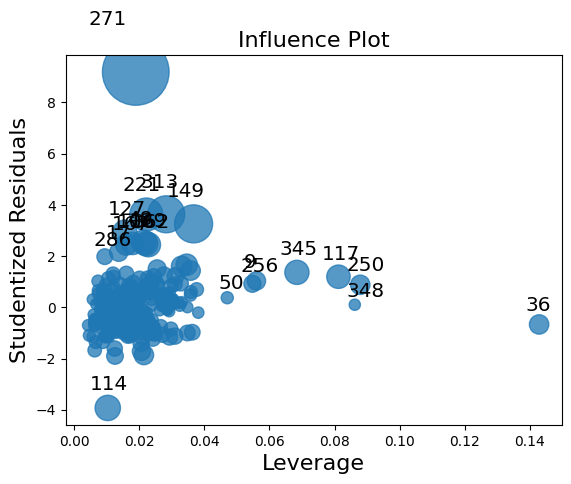

In [142]:
fig = sm.graphics.influence_plot(model, criterion="cooks")

## Determinar puntos de alta influencia con distancia de Cook y umbral $4/n$

In [134]:
# distancia de Cook
model_cooksd = model.get_influence().cooks_distance[0]

# get length of df to obtain n
n = X_train.shape[0]

# umbral
critical_d = 4/n
print('Umbral con distancia de Cook:', critical_d)

# puntos que podrían ser ourliers con alta influencia
out_d = model_cooksd > critical_d

print(X_train.index[out_d], "\n", model_cooksd[out_d])

Umbral con distancia de Cook: 0.012903225806451613
Index([313, 271, 106, 362, 345, 129, 48, 114, 117, 221, 149, 167, 127, 383,
       387],
      dtype='int64', name='No') 
 [0.06154703 0.21309099 0.01868677 0.02290004 0.02274654 0.02275256
 0.02311492 0.02559993 0.02099477 0.04770419 0.0653493  0.01598439
 0.02226782 0.01642899 0.01446638]
